In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
trainX = pd.read_csv("train.csv").select_dtypes(exclude=['object']).fillna(method="bfill", axis=0).fillna(0)
trainy = trainX.pop("SalePrice")
testX = pd.read_csv("test.csv").select_dtypes(exclude=['object']).fillna(method="bfill", axis=0).fillna(0)

input_shape=[trainX.shape[1]]

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1),
])

model.compile(
    optimizer="adam",
    loss="mae"
)


In [4]:
history = model.fit(
    trainX, trainy,
    validation_data=(trainX, trainy),
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0)

<AxesSubplot:>

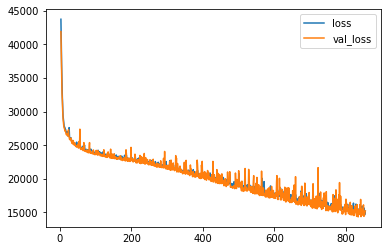

In [5]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[3:, ['loss', 'val_loss']].plot()

In [6]:
prediction = model.predict(testX)
thePrediction = pd.DataFrame(prediction, columns=['SalePrice']).to_csv("pred1.csv")
#df = pd.read_csv('pred.csv', delim_whitespace=True, sep=r'\s*,\s*', delimiter=",")
#print(df8)
#print(df.columns.tolist()[1])
#print(df["SalePrice"])
#print(thePrediction["Id"]) 

C:\Users\Emil\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

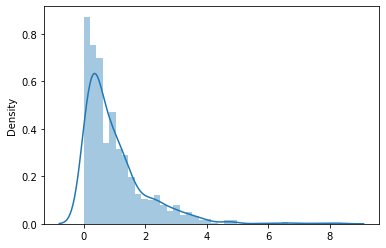

In [7]:
n=np.random.exponential(size=1000)

fig, ax = plt.pyplot.subplots(1)
import seaborn as sns
sns.distplot(n, ax=ax)
